In [2]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import math as math
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline

# Bifurcations of equilibria: pitchfork bifurcation.
Consider the two dynamical systems:
$$ \dot{x} = rx + x^3 $$
$$ \dot{x} = rx - x^3 $$
where $r$ and $x$ can take negative values. Calculate their equilibrium points and stability
as function of parameter r and plot the bifurcation diagram


## Equilibrium values of $\dot{x} = rx + x^3$

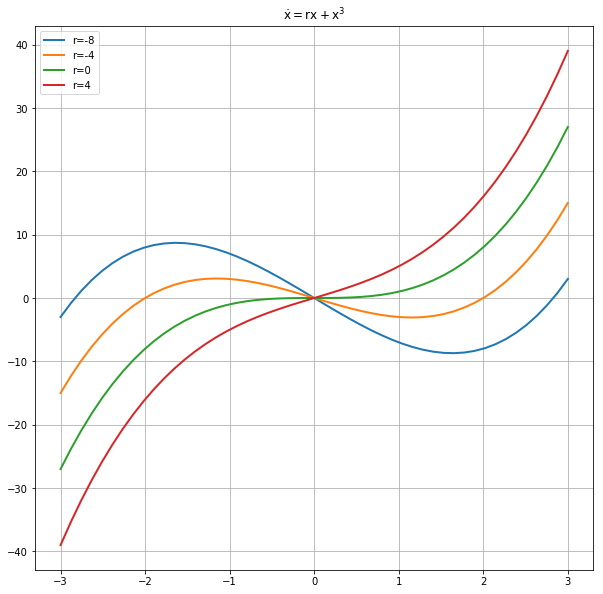

In [52]:
r = -4
x = np.linspace(-3, 3, num = 50)
#print(x)
plt.figure(figsize=(10,10))
plt.grid()
for r in [-8, -4, 0, 4]:
    f_x = r * x + x ** 3
    plt.plot(x , f_x, linewidth=2.0, label="r=%d"%(r,))
leg = plt.legend(loc='best', ncol=1)
_ = plt.title("$ \dot{x} = rx + x^3 $")

$$ f(x) = rx + x^3 = x(r + x^2) = 0 $$

so, the roots are the solutions of:

$$ \begin{array}{l} x = 0 \\ x^2 + r = 0 \end{array} $$

therefore, we have three possible values of $x$ that hold equilibrium points

$$ \begin{array}{l} x = 0 \\ x = \sqrt -r \\  x = -\sqrt -r \end{array} $$

checking the sign of $f'(x) = 3x^2 + r$ in each point.

if $r < 0$, we have three real roots and so three equilibrium points:

$$ \begin{array}{l} x = 0, f'(0) = r < 0 => stable \\ x = \sqrt -r, f'(\sqrt -r) = -3r + r = -2r > 0 => unstable \\  x = -\sqrt -r, f'(-\sqrt -r) = -3r + r = -2r > 0 => unstable \end{array} $$

if $r > 0$, we have only one real root:

$$ \begin{array}{l} x = 0, f'(0) = r > 0 => unstable \end{array} $$

if $r = 0$, we have to take into account second order and third order term in Taylor development: $f''(x) = 6x$, also goes to 0 in 0, but  $f'''(x) = 6 > 0$. 

So, very near of 0: $f(x) = 6x^3/ 3!$ that is positive if $x>0$ and negative if $x<0$, so f is monotonically increasing around 0, and then x is an unstable equilibrium point.

This result is coherent with the observed in the graph (flux vectors).

## Bifurcation diagram of $\dot{x} = rx + x^3$

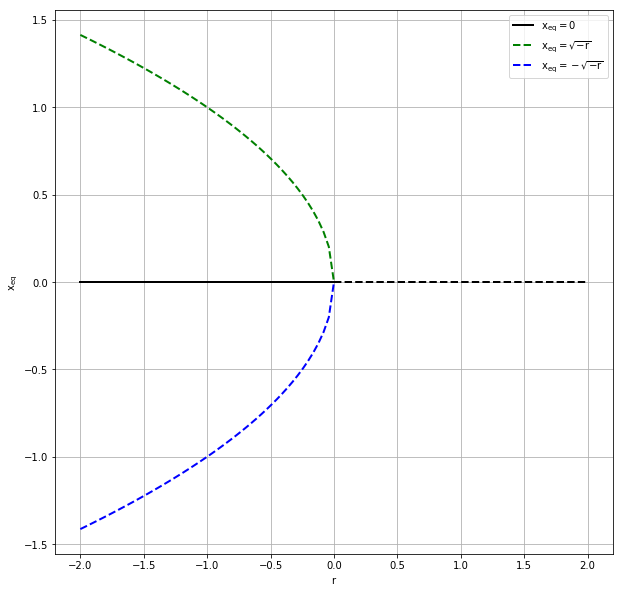

In [73]:
r = np.linspace(-2, 0, num = 50)
#print(x)
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(r, np.zeros(50), linewidth=2.0, color='black', label="$ x_{eq} = 0$")
plt.plot(r, np.sqrt(-r), linewidth=2.0, linestyle = 'dashed',color='green', label="$ x_{eq} = \sqrt{-r}$")
plt.plot(r, -np.sqrt(-r), linewidth=2.0, linestyle = 'dashed',color='blue', label="$ x_{eq} = -\sqrt{-r}$")
r = np.linspace(0, 2, num = 50)
plt.plot(r, np.zeros(50), linewidth=2.0, color='black', linestyle = 'dashed')

leg = plt.legend(loc='best', ncol=1)
_ = plt.xlabel("$ r $")
_ = plt.ylabel("$ x_{eq} $")

## Equilibrium values of $\dot{x} = rx - x^3$

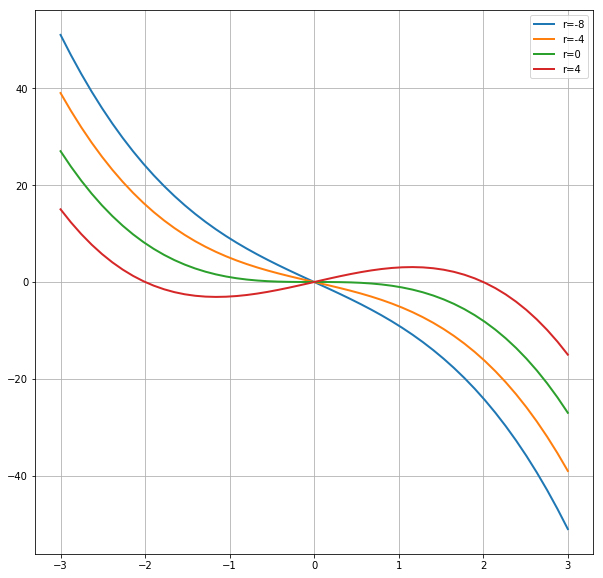

In [31]:
x = np.linspace(-3, 3, num = 50)
#print(x)
plt.figure(figsize=(10,10))
plt.grid()
for r in [-8, -4, 0, 4]:
    f_x = r * x - x ** 3
    plt.plot(x , f_x, linewidth=2.0, label="r=%d"%(r,))
leg = plt.legend(loc='best', ncol=1)

$$ f(x) = rx - x^3 = x(r - x^2) = 0 $$

so, the roots are the solutions of:

$$ \begin{array}{l} x = 0 \\ -x^2 + r = 0 \end{array} $$

therefore, we have three possible values of $x$ that hold equilibrium points

$$ \begin{array}{l} x = 0 \\ x = \sqrt r \\  x = -\sqrt r \end{array} $$

checking the sign of $f'(x) = -3x^2 + r$ in each point.

if $r > 0$, we have three real roots and so three equilibrium points:

$$ \begin{array}{l} x = 0, f'(0) = r > 0 => unstable \\ x = \sqrt r, f'(\sqrt r) = -3r + r = -2r < 0 => stable \\  x = -\sqrt r, f'(-\sqrt r) = -3r + r = -2r < 0 => stable \end{array} $$

if $r < 0$, we have only one real root:

$$ \begin{array}{l} x = 0, f'(0) = r < 0 => stable \end{array} $$

if $r = 0$, we have to take into account second order and third order term in Taylor development: $f''(x) = -6x$, also goes to 0 in 0, but $f'''(x) = -6 < 0$. 

So, very near of 0: $f(x) = -6x^3/ 3!$ that is negative if $x>0$ and positive if $x<0$, so f is monotonically decreasing around 0, and then x is an stable equilibrium point.

This result is coherent with the observed in the graphs.

## Bifurcation diagram of $\dot{x} = rx - x^3$

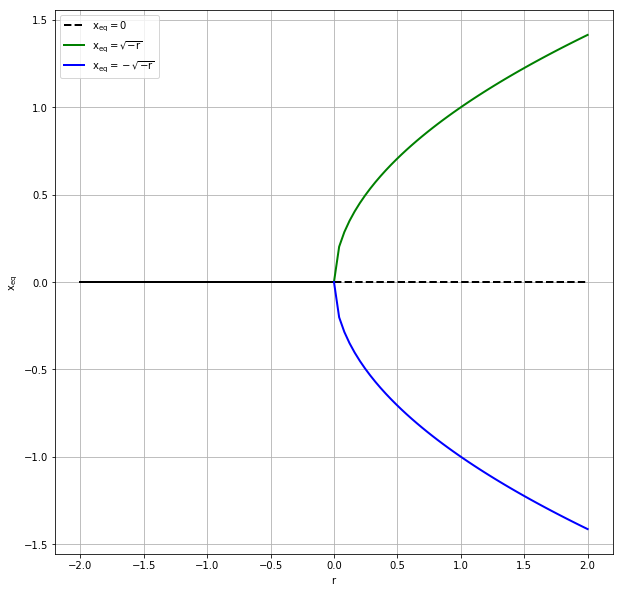

In [75]:
plt.figure(figsize=(10,10))
plt.grid()
r = np.linspace(-2, 0, num = 50)
plt.plot(r, np.zeros(50), linewidth=2.0, color='black')

r = np.linspace(0, 2, num = 50)

plt.plot(r, np.zeros(50), linewidth=2.0, color='black', linestyle = 'dashed', label="$ x_{eq} = 0$")
plt.plot(r, np.sqrt(r), linewidth=2.0, color='green', label="$ x_{eq} = \sqrt{-r}$")
plt.plot(r, -np.sqrt(r), linewidth=2.0, color='blue', label="$ x_{eq} = -\sqrt{-r}$")

leg = plt.legend(loc='best', ncol=1)
_ = plt.xlabel("$ r $")
_ = plt.ylabel("$ x_{eq} $")

# Equilibria of two-variable systems

Calculate the equilibria and discuss their type and stability (based on the eigenvalues) of
the simplified Lotka-Volterra equations:

$$ \dot{u} = u(1 - v) $$
$$ \dot{v} = \alpha v(u - 1) $$

Is there any bifurcation as a function of the parameter $\alpha$?

The equilibrium points $(u, v)$ that make 0 the derivatives are clearly $(0,0)$ and $(1,1)$.

We will guess the qualitative patterns of behavior by means of linearization around equilibrium points.

The Jacobian matrix:

$$\begin{bmatrix}
  \frac{\partial f}{\partial u} &
  \frac{\partial f}{\partial v} \\
  \frac{\partial g}{\partial u} &
  \frac{\partial g}{\partial v}
\end{bmatrix}
$$

is in this case: 

$$\begin{bmatrix}
  {1 - v} &
  {-1} \\
  {\alpha v} &
  {u - 1}
\end{bmatrix}
$$

**At equilibrium point $(0, 0)$**

$$\begin{bmatrix}
  {1} &
  {-1} \\
  {0} &
  {-1}
\end{bmatrix}
$$

So, equating to zero the determinant for diagonalization:

$$\begin{vmatrix}
  {1 -\lambda} &
  {-1} \\
  {0} &
  {-1 -\lambda}
\end{vmatrix}
= 0
$$

we obtain the characteristic equation:
$$(1 - \lambda)(-1 - \lambda) = 0$$

with solutions:

$$\begin{array}{l}
  \lambda_{+} = 1 \\
  \lambda_{-} = -1
\end{array}
$$

Applying this values to the linearized equations:

$$\begin{array}{l}
    \delta y_{+}(t) = \delta y(0) * e^t \\
    \delta y_{-}(t) = \delta y(0) * e^{-t}
\end{array}
$$

Therefore the first direction the derivative is increasing so unestable and the second and orthogonal direction the derivative is decreasing so stable. Therefore we have a **saddle point**. 

This prevents that initial small populations of preys and predators doesn't evolve easily to extinction.

**At equilibrium point $(1, 1)$**

$$\begin{bmatrix}
  {0} &
  {-1} \\
  {\alpha} &
  {0}
\end{bmatrix}
$$

So, equating to zero the determinant for diagonalization:

$$\begin{vmatrix}
  {-\lambda} &
  {-1} \\
  {\alpha} &
  {-\lambda}
\end{vmatrix}
= 0
$$

we obtain the characteristic equation:
$$\lambda^2 + \alpha = 0$$

with solutions:

$$\begin{array}{l}
  \lambda_{+} = \sqrt -\alpha \\
  \lambda_{-} = -\sqrt -\alpha
\end{array}
$$

If $\alpha < 0$ the eigenvalues are real and:

$$\begin{array}{l}
  \lambda_{+} > 0  \\
  \lambda_{-} < 0
\end{array}
$$

thus, the first direction the derivative is increasing so unestable and the second and orthogonal direction the derivative is decreasing so stable. Therefore we have a **saddle point**. But the value of this parameter is always positive in this model.

If $\alpha > 0$ the eigenvalues are conjugate complex with no real part:

$$\begin{array}{l}
  \lambda_{+} =  i \sqrt \alpha \\
  \lambda_{-} = -i \sqrt \alpha 
\end{array}
$$

So the point **$(1, 1)$ is a center** and the populations of prey and predator evolve synchronously following a periodic pattern.

For $\alpha = 0$ there is an abrupt change in behavior from center to saddle (the roots became real roots), but as I say before this parameter is always positive in the model definition (is equal to the product of increasing rates of prey and predator in absence or the other).

# Outputs

In [3]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx exercise2.ipynb 1> /dev/null
/Library/TeX/texbin/pdflatex -shell-escape exercise2 1> /dev/null
#jupyter nbconvert --to html_with_toclenvs exercise2.ipynb 1> /dev/null

[NbConvertApp] Converting notebook exercise2.ipynb to latex
/Users/nandoide/miniconda3/lib/python3.7/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.2.3.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/Users/nandoide/miniconda3/lib/python3.7/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.2.3.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/Users/nandoide/miniconda3/lib/python3.7/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.2.3.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_ve